# Model

In [26]:
import pandas as pd

df = pd.read_csv('cleaned_combined_2015_2020.csv')

# display df.columns in a dataframe
cols = df.columns
# display max rows
pd.set_option('display.max_rows', None)
# display col width to 100
pd.set_option('display.max_colwidth', 100)
cols_df = pd.DataFrame({'Variable_Names': cols})
cols_df

,Variable_Names
0,student_totals_seniors
1,specific_interactions_1-on-1s_total
2,specific_interactions_group_total
3,specific_interactions_1-on-1s_at_least_one
4,specific_interactions_group_at_least_one
5,specific_interactions_parent_meetings
6,specific_interactions_parent_meetings_at_least_one
7,total_interactions_met_with_1_plus_times_(group_and_1_1)
8,total_interactions_met_with_3_plus_times_(group_and_1_1)
9,total_interactions_met_with_5_plus_times_(group_and_1_1)


# VIF: Variance Inflation Factor

- Question: How much multicollinearity would be in the model?
- VIF is a measure of multicollinearity among the independent variables within a multiple regression. 
- It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variance of a single beta if it were fit alone.

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Convert non-numeric columns to numeric if possible, or exclude them
df = df.select_dtypes(include=[np.number])

# Add a constant to the dataframe for the intercept
df = sm.add_constant(df)

# Calculate VIF
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [round(variance_inflation_factor(df.values, i),3) for i in range(df.shape[1])]

vif

/Volumes/External SSD NVMe PCIe 1TB/Data Science/Academic/UVA_MSDS/Capstone/capstone_venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Volumes/External SSD NVMe PCIe 1TB/Data Science/Academic/UVA_MSDS/Capstone/capstone_venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,student_totals_seniors,721.210
1,specific_interactions_1-on-1s_total,1013.168
2,specific_interactions_group_total,2103.895
3,specific_interactions_1-on-1s_at_least_one,295.675
4,specific_interactions_group_at_least_one,488.927
5,specific_interactions_parent_meetings,503.562
6,specific_interactions_parent_meetings_at_least_one,374.291
7,total_interactions_met_with_1_plus_times_(group_and_1_1),1047.069
8,total_interactions_met_with_3_plus_times_(group_and_1_1),1063.264
9,total_interactions_met_with_5_plus_times_(group_and_1_1),1026.135


In [28]:
# first attempt to iterate through subsets of 5 variables to see if any combination of 5 variables has low multicollinearity
# # maybe subsets of 5 variables will perform better, let mine them all and see if anything works in the multicollinearity sense
# from itertools import combinations
# import statsmodels.api as sm

# df = pd.read_csv('cleaned_combined_2015_2020.csv')

# df = pd.get_dummies(df, columns=['school_name', 'year_starting'])

# school_name_cols = [col for col in df.columns if col.startswith('school_name')]
# year_starting_cols = [col for col in df.columns if col.startswith('year_starting')]
 
# df = df[[col for col in df.columns if col.endswith('_rate')]]

# # drop school_name
# df = df.drop(columns=['enrolled_rate'])

# combos = set(list(combinations(df.columns, 2)))

# combos = [list(combination) + school_name_cols + year_starting_cols for combination in combos]

# print(len(combos))

# results = []
# for combination in combos:
#     X = df[list(combination)]
#     y = df['enrolled_rate']
#     X = sm.add_constant(X)
#     model = sm.OLS(y, X).fit()
#     results.append({'combination': combination, 'vif': [round(variance_inflation_factor(X.values, i),3) for i in range(X.shape[1])], 'rsquared': model.rsquared, 'rsquared_adj': model.rsquared_adj, 'aic': model.aic, 'bic': model.bic})
#     results_df = pd.DataFrame(results)
    
# results_df

That is some multi-collinearity! All features are highly correlated with each other. This is a significant problem for a simple linear model. 

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_csv('cleaned_combined_2015_2020.csv')

# interest variable set by the question
df_out = pd.DataFrame()

vars =['specific_interactions_1-on-1s_total_rate',
'specific_interactions_group_total_rate',
'specific_interactions_1-on-1s_at_least_one_rate',
'specific_interactions_group_at_least_one_rate',
'specific_interactions_parent_meetings_rate',
'specific_interactions_parent_meetings_at_least_one_rate',
'total_interactions_met_with_1_plus_times_(group_and_1_1)_rate',
'total_interactions_met_with_3_plus_times_(group_and_1_1)_rate',
'total_interactions_met_with_5_plus_times_(group_and_1_1)_rate',
'total_interactions_met_with_10_plus_times_(group_and_1_1)_rate']

for var in vars:
    
    variable_of_primary_interest = var

    # One-hot encode categorical variables
    df = pd.read_csv('cleaned_combined_2015_2020.csv')
    df = pd.get_dummies(df, columns=['school_name', 'year_starting'])

    # Separate the variable to exclude response variable defining
    y = df['enrolled_rate']

    # Drop the variable the response from the predictors
    x = df.drop(['enrolled_rate', variable_of_primary_interest], axis=1)

    # Standardize the predictors
    X_scaled = StandardScaler().fit_transform(x)

    # Apply PCA to the predictors
    adj_r_squared = []
    effect_coefficients = []
    effect_pvals = []
    mses = []
    other_effect_coefficients = []
    constants = []
    pcs = []   

    for i in range(45):
        pca = PCA(n_components=i+1)
        X_pca = pca.fit_transform(X_scaled)

        # combnine the PCA components with te excluded variable
        X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
        X_pca[variable_of_primary_interest] = df[variable_of_primary_interest]

        # pval
        x2 = sm.add_constant(X_pca)
        est = sm.OLS(y, x2)
        est2 = est.fit()
        # show all of the summary
        #print(est2.summary())
            
        # counselor effect coefficient
        effect_coefficients.append(est2.params[variable_of_primary_interest])
        effect_pvals.append(est2.pvalues[variable_of_primary_interest])

        # adjusted r-squared from est2
        # print(est2.rsquared_adj)
        adj_r_squared.append(est2.rsquared_adj)

        # add up all of the coefficients that are not the variable of primary interest, no constant
        other_effect_coefficients.append(est2.params.drop(variable_of_primary_interest).drop('const').sum())

        # constant
        constants.append(est2.params['const'])

        # mse from est2
        mses.append(est2.mse_resid)
        
        # print the number of components
        pcs.append(i+1)

        df_in = pd.DataFrame({'pcs': pcs,
                    'adj_r_squared': adj_r_squared,
                    'mse': mses,
                    'var': variable_of_primary_interest,
                    'var_effect_coefficients': effect_coefficients,
                    'effect_pvals': effect_pvals,
                    'other_effect_coefficients': other_effect_coefficients,
                    'intercept': constants})

    df_out = pd.concat([df_out, df_in], axis=0)

Kaiser's rule is a heuristic used in factor analysis, including Principal Component Analysis (PCA), to decide how many components to retain. The rule suggests that only components with eigenvalues greater than 1 should be retained.

The rationale behind Kaiser's rule is that any individual principal component should explain more variance than any single original variable. In PCA, the eigenvalue of a component is equal to the variance explained by that component. 

In standard PCA where the data has been standardized (mean of 0 and standard deviation of 1), each original variable explains exactly 1 unit of variance. Therefore, if a principal component has an eigenvalue less than 1, it is explaining less variance than a single variable from the original dataset, and thus, may not be adding much value.

However, it's important to note that Kaiser's rule is a rule of thumb and may not always be the best approach. It can sometimes overestimate or underestimate the number of components. Other methods, such as looking at the scree plot or considering the cumulative explained variance, can also be useful in deciding the number of components to retain.

# Selection of Principal Components

Ideal number of components (Kaiser's Rule): 32
Ideal number of components (95% variance): 40


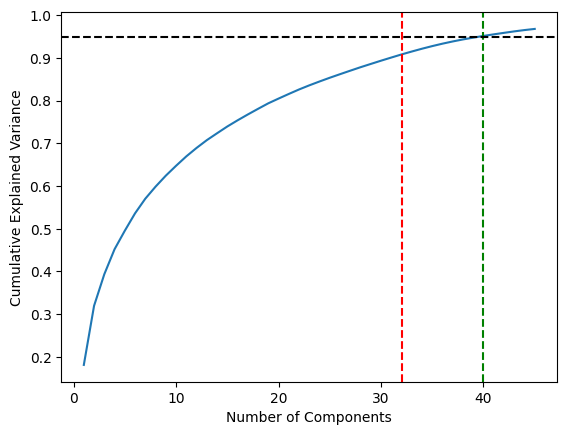

In [30]:
#Kaiser's Rule
eigenvalues = pca.explained_variance_
ideal_components_kaiser = len(eigenvalues[eigenvalues > 1])
print("Ideal number of components (Kaiser's Rule):", ideal_components_kaiser)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
ideal_components = np.where(cumulative_variance > 0.95)[0][0] + 1  # 95% variance
print('Ideal number of components (95% variance):', ideal_components)

# Cumulative explained variance
# Scree plot
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=ideal_components_kaiser, color='r', linestyle='--')
plt.axvline(x=ideal_components, color='g', linestyle='--')
plt.axhline(y=0.95, color='k', linestyle='--')
plt.show()

In [31]:
df_results

,pcs,adj_r_squared,mse,var,var_effect_coefficients,effect_pvals,other_effect_coefficients,intercept
31,32,0.916286,0.000799,specific_interactions_1-on-1s_total_rate,0.006447,0.006217,0.108951,0.574267
31,32,0.913663,0.000824,specific_interactions_group_total_rate,-0.002183,0.041051,0.067467,0.599944
31,32,0.909050,0.000868,total_interactions_met_with_5_plus_times_(group_and_1_1)_rate,0.065244,0.040982,0.101543,0.572865
31,32,0.915363,0.000808,total_interactions_met_with_10_plus_times_(group_and_1_1)_rate,0.159910,0.000988,0.065965,0.574699


In [32]:
import pandas as pd
import numpy as np 

df = pd.read_csv('cleaned_combined_2015_2020.csv')
df = pd.get_dummies(df, columns=['school_name', 'year_starting'])

# keep variables that are  rates
rate_cols = [col for col in df.columns if col.endswith('_rate')]
# keep variables that are dummies
dummy_cols = [col for col in df.columns if col.startswith('school_name') or col.startswith('year_starting')]
# also keep student counts
df = df[rate_cols + dummy_cols + ['enrolled_rate', 'student_totals_seniors', 'vdoe_total']]

dependent_var = 'enrolled_rate'
variable_of_primary_interest = 'specific_interactions_1-on-1s_total_rate'

# Separate the variable to exclude response variable defining
y = df[dependent_var]

# Drop the variable the response from the predictors
x = df.drop([dependent_var, variable_of_primary_interest], axis=1)

# Standardize the predictors
X_scaled = StandardScaler().fit_transform(x)

# Assume X is your data
pca = PCA(n_components=5)  # Change to the number of components you want
pca.fit_transform(X_scaled)

# The coefficients of the original variables in the principal components
loadings = pca.components_
loadings.transpose().shape
# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(loadings, 
                           columns=df.drop([dependent_var, variable_of_primary_interest], axis=1).columns,
                           index=['PC'+str(i+1) for i in range(loadings.shape[0])]).transpose()
print("Loadings:")
# sum rows and sort
loadings_df['sum'] = loadings_df.sum(axis=1)



Loadings:


In [33]:
loadings_df.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4,PC5,sum
student_totals_seniors,0.132401,-0.007187,0.059069,0.255065,0.228431,0.667779
vdoe_total,0.131042,-0.021270,0.056003,0.252426,0.238543,0.656744
year_starting_2020.0,0.124582,-0.016363,0.085997,-0.054670,-0.076902,0.062644
school_name_Alexandria City High School,0.111045,0.010026,0.085705,0.249516,0.151299,0.607591
school_name_Orange County High School,0.036705,-0.032025,-0.030290,-0.031453,0.019007,-0.038055
school_name_Tunstall High School,0.036637,-0.077107,-0.123404,-0.021299,-0.056165,-0.241338
school_name_George Washington High School,0.033448,0.056483,0.054992,0.065634,0.010183,0.220740
school_name_Magna Vista High School,0.030292,-0.002089,-0.047581,0.012609,0.042653,0.035884
econ_total_rate,0.024939,0.250757,0.027719,0.045701,-0.097223,0.251892
school_name_Dan River High School,0.021302,-0.016211,-0.084081,0.026487,-0.110933,-0.163437


# Interpretation:

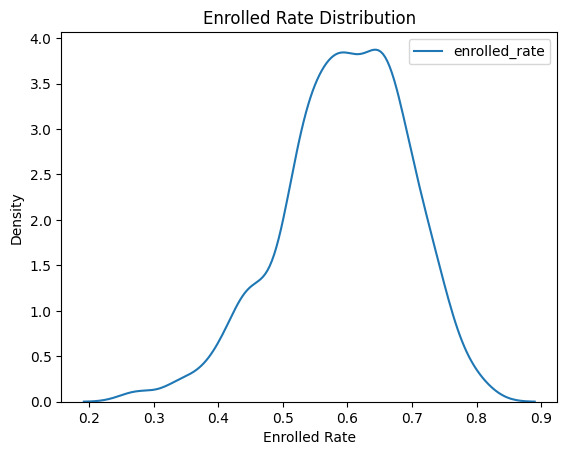

In [34]:
sns.kdeplot(df['enrolled_rate']) 
plt.xlabel('Enrolled Rate') 
plt.ylabel('Density') 
plt.title('Enrolled Rate Distribution') 
plt.show()

In [35]:
# create a variable for the enrolled rate third
enrolled_rate_bottom_third = df['enrolled_rate'].quantile(0.33)
enrolled_rate_middle_third = df['enrolled_rate'].quantile(0.66)

# cut the enrolled rate into three categories
df['enrolled_rate_category'] = pd.cut(df['enrolled_rate'], [0, enrolled_rate_bottom_third, enrolled_rate_middle_third, 1], labels=['bottom_third', 'middle_third', 'top_third'])

ValueError: Input array must be 1 dimensional

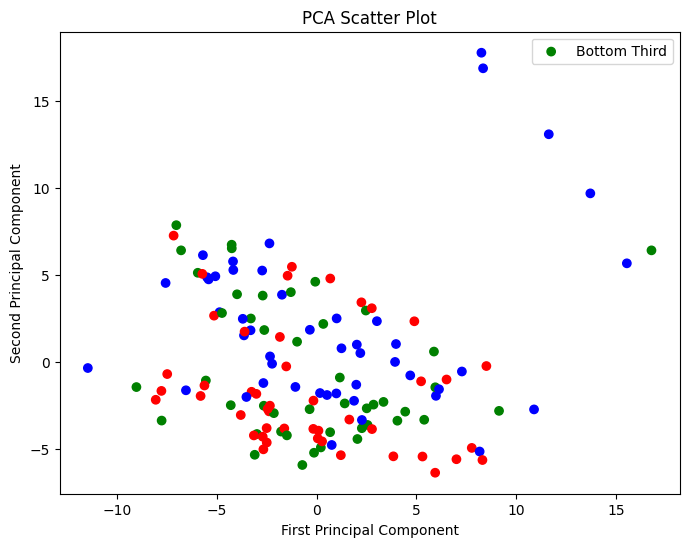

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

color_dict = {'bottom_third': 'red', 'middle_third': 'green', 'top_third': 'blue'}

# Apply PCA
pca = PCA(n_components=32)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['enrolled_rate_category'].map(color_dict))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(loc='upper right', labels=['Bottom Third', 'Middle Third', 'Top Third'])
plt.title('PCA Scatter Plot')
plt.show()

In [24]:
# filter out the rows with p-value > 0.05 and pcs = 32
df_results = df_out[(df_out['effect_pvals'] < 0.05) & (df_out['pcs'] == 32)]
df_results

,pcs,adj_r_squared,mse,var,var_effect_coefficients,effect_pvals,other_effect_coefficients,intercept
31,32,0.916286,0.000799,specific_interactions_1-on-1s_total_rate,0.006447,0.006217,0.108951,0.574267
31,32,0.913663,0.000824,specific_interactions_group_total_rate,-0.002183,0.041051,0.067467,0.599944
31,32,0.909050,0.000868,total_interactions_met_with_5_plus_times_(group_and_1_1)_rate,0.065244,0.040982,0.101543,0.572865
31,32,0.915363,0.000808,total_interactions_met_with_10_plus_times_(group_and_1_1)_rate,0.159910,0.000988,0.065965,0.574699


In [20]:
# group by var calculate the average var_effect_coefficients
df_out[df_out['effect_pvals']<=.05].groupby('var').mean().sort_values(by='var_effect_coefficients', ascending=False)

,pcs,adj_r_squared,mse,var_effect_coefficients,effect_pvals,other_effect_coefficients,intercept
var,,,,,,,
total_interactions_met_with_10_plus_times_(group_and_1_1)_rate,29.500000,0.904417,0.000912,0.158358,0.003633,0.065541,0.574900
total_interactions_met_with_5_plus_times_(group_and_1_1)_rate,30.428571,0.904306,0.000913,0.072894,0.029067,0.096319,0.570222
specific_interactions_1-on-1s_total_rate,23.636364,0.764539,0.002248,0.001920,0.012178,0.078427,0.589111
specific_interactions_group_total_rate,26.947368,0.813440,0.001781,-0.000896,0.019636,0.048708,0.597267
total_interactions_met_with_3_plus_times_(group_and_1_1)_rate,8.000000,0.431631,0.005425,-0.002437,0.021866,0.003256,0.596723
total_interactions_met_with_1_plus_times_(group_and_1_1)_rate,26.000000,0.785941,0.002043,-0.043546,0.023055,0.027806,0.632122
specific_interactions_1-on-1s_at_least_one_rate,44.000000,0.961443,0.000368,-0.044602,0.029538,0.020210,0.629302
specific_interactions_group_at_least_one_rate,19.285714,0.798282,0.001925,-0.051376,0.023050,0.014538,0.629685
specific_interactions_parent_meetings_at_least_one_rate,13.500000,0.636557,0.003469,-0.122484,0.033655,0.052543,0.623203


1. https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f#3b4c 
2. https://www.youtube.com/watch?v=-5nnciZ9hgc
3. https://bookdown.org/ssjackson300/Machine-Learning-Lecture-Notes/pcr.html